In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data = pd.read_csv("open_meteo.csv",index_col = 0)
data['time'] = pd.to_datetime(data['time'], format='%m/%d/%Y')
data.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,0,26.0,14.8,20.9,24.0,13.4,18.6,2010-01-01T02:16,2010-01-01T12:54,...,0,18.3,25.6,54,4.38,24.900002,67.0,8,Pakistan,Karachi
1,2010-01-02,2,25.3,15.6,20.5,21.8,13.7,18.1,2010-01-02T02:17,2010-01-02T12:54,...,0,24.6,35.3,64,3.84,24.900002,67.0,8,Pakistan,Karachi
2,2010-01-03,0,25.0,14.3,19.9,22.8,14.2,18.9,2010-01-03T02:17,2010-01-03T12:55,...,0,16.6,28.1,312,3.69,24.900002,67.0,8,Pakistan,Karachi
3,2010-01-04,0,25.6,15.0,20.4,23.9,13.7,19.4,2010-01-04T02:17,2010-01-04T12:56,...,0,14.0,22.7,353,3.63,24.900002,67.0,8,Pakistan,Karachi
4,2010-01-05,0,25.4,16.3,20.7,24.5,16.8,20.7,2010-01-05T02:17,2010-01-05T12:56,...,0,19.3,29.2,270,3.55,24.900002,67.0,8,Pakistan,Karachi


In [3]:
data['precipitation_rate'] = data['precipitation_sum'] / data['precipitation_hours']
data['precipitation_rate'].fillna(0, inplace=True)
data.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city,precipitation_rate
0,2010-01-01,0,26.0,14.8,20.9,24.0,13.4,18.6,2010-01-01T02:16,2010-01-01T12:54,...,18.3,25.6,54,4.38,24.900002,67.0,8,Pakistan,Karachi,0.0
1,2010-01-02,2,25.3,15.6,20.5,21.8,13.7,18.1,2010-01-02T02:17,2010-01-02T12:54,...,24.6,35.3,64,3.84,24.900002,67.0,8,Pakistan,Karachi,0.0
2,2010-01-03,0,25.0,14.3,19.9,22.8,14.2,18.9,2010-01-03T02:17,2010-01-03T12:55,...,16.6,28.1,312,3.69,24.900002,67.0,8,Pakistan,Karachi,0.0
3,2010-01-04,0,25.6,15.0,20.4,23.9,13.7,19.4,2010-01-04T02:17,2010-01-04T12:56,...,14.0,22.7,353,3.63,24.900002,67.0,8,Pakistan,Karachi,0.0
4,2010-01-05,0,25.4,16.3,20.7,24.5,16.8,20.7,2010-01-05T02:17,2010-01-05T12:56,...,19.3,29.2,270,3.55,24.900002,67.0,8,Pakistan,Karachi,0.0


In [4]:
# Check for duplicates
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print('Duplicate rows found:')
    print(duplicates)
else:
    print('No duplicate rows found\n')

# Check for missing Values & Data types
data.info()

No duplicate rows found

<class 'pandas.core.frame.DataFrame'>
Index: 34762 entries, 0 to 34761
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        34762 non-null  datetime64[ns]
 1   weathercode                 34762 non-null  int64         
 2   temperature_2m_max          34762 non-null  float64       
 3   temperature_2m_min          34762 non-null  float64       
 4   temperature_2m_mean         34762 non-null  float64       
 5   apparent_temperature_max    34762 non-null  float64       
 6   apparent_temperature_min    34762 non-null  float64       
 7   apparent_temperature_mean   34762 non-null  float64       
 8   sunrise                     34762 non-null  object        
 9   sunset                      34762 non-null  object        
 10  shortwave_radiation_sum     34762 non-null  float64       
 11  precipitation_sum           34762 

In [5]:
data['shortwave_radiation_sum'].describe()

count    34762.000000
mean        19.105281
std          5.091534
min          0.720000
25%         16.670000
50%         19.570000
75%         22.610000
max         29.320000
Name: shortwave_radiation_sum, dtype: float64

### What is the distribution of shortwave radiation values in the dataset? 

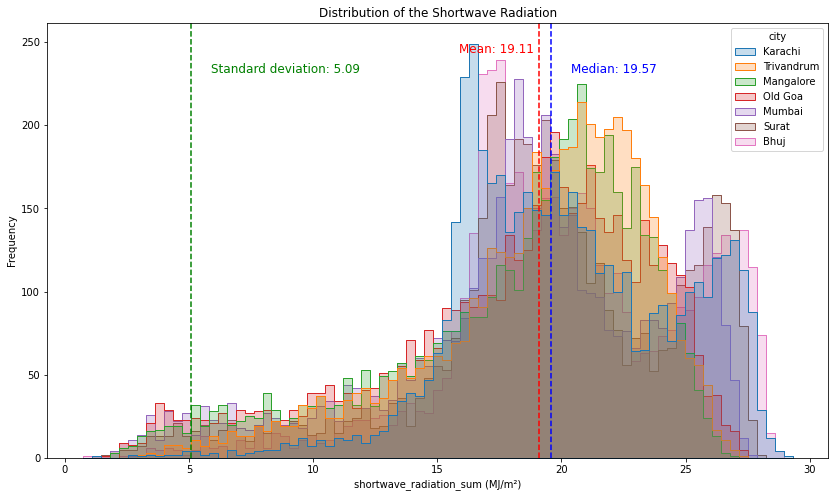

In [6]:
# Show Distribution of the Shortwave Radiation Values for Different Cities
plt.figure(figsize=(14, 8))
sns.histplot(data=data, x='shortwave_radiation_sum', hue='city', element='step', common_norm=False)

mean = np.mean(data['shortwave_radiation_sum'])
median = np.median(data['shortwave_radiation_sum'])
std_deviation = np.std(data['shortwave_radiation_sum'])

plt.axvline(mean, color='red', linestyle='--')
plt.axvline(median, color='blue', linestyle='--')
plt.axvline(x=std_deviation, color='green', linestyle='--')

# annotate mean,median & Standard deviation
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, plt.gca().get_ylim()[1]), xytext=(-80, -30),
             textcoords='offset points', color='red', fontsize=12)
plt.annotate(f'Median: {median:.2f}', xy=(median, plt.gca().get_ylim()[1]), xytext=(20, -50),
             textcoords='offset points', color='blue', fontsize=12)
plt.annotate(f'Standard deviation: {std_deviation:.2f}', xy=(std_deviation, plt.gca().get_ylim()[1]), xytext=(20, -50),
             textcoords='offset points', color='green', fontsize=12)
plt.xlabel('shortwave_radiation_sum (MJ/m²)')
plt.ylabel('Frequency')
plt.title('Distribution of the Shortwave Radiation')
plt.show()

### What is the correlation between various weather-related variables (shortwave radiation, precipitation rate, different temperature features, and apparent temperature features) in the dataset?

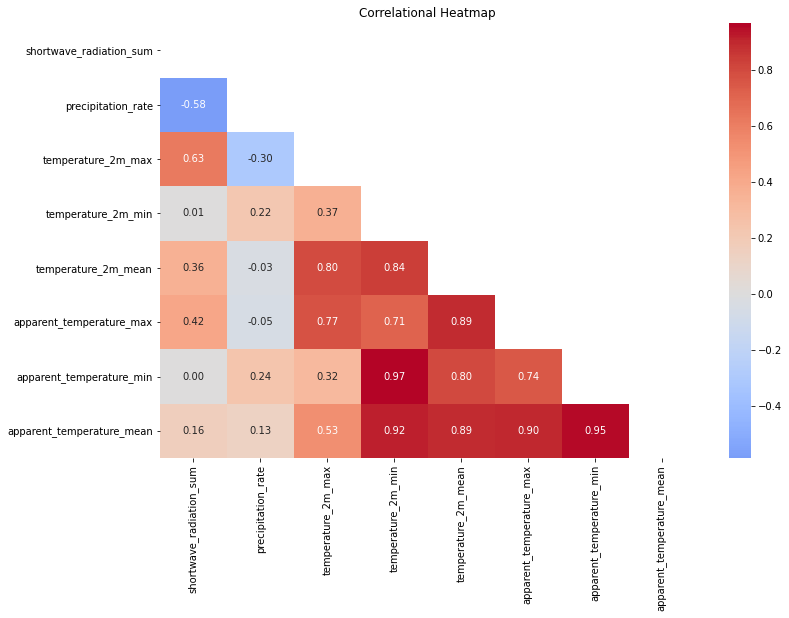

In [7]:
# Check for correlation between shortwave_radiation, Precipitation & different temperature features
correlation_matrix = data[['shortwave_radiation_sum', 'precipitation_rate',
                           'temperature_2m_max', 'temperature_2m_min','temperature_2m_mean', 
                           'apparent_temperature_max','apparent_temperature_min', 'apparent_temperature_mean']].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask, fmt=".2f")
plt.xticks(rotation = 90)
plt.title('Correlational Heatmap')
plt.show()

### How does the shortwave radiation vary over time for different cities?

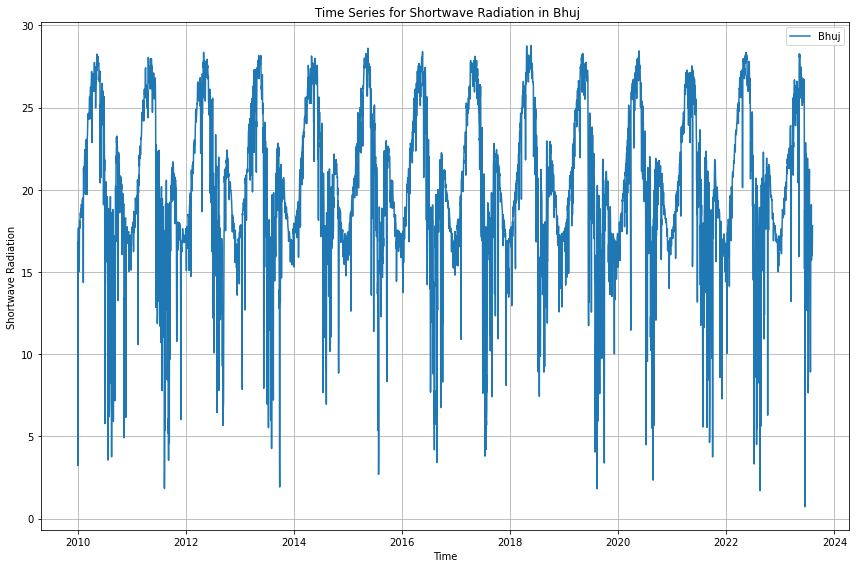

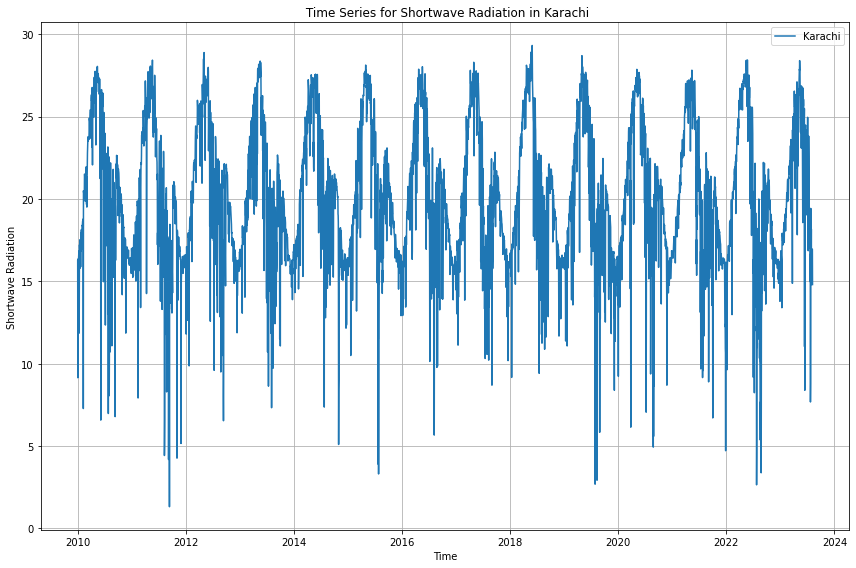

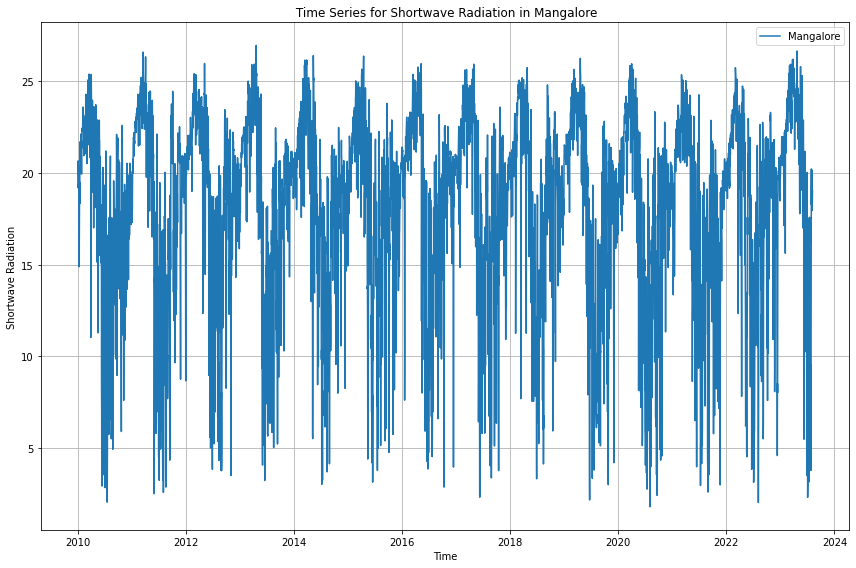

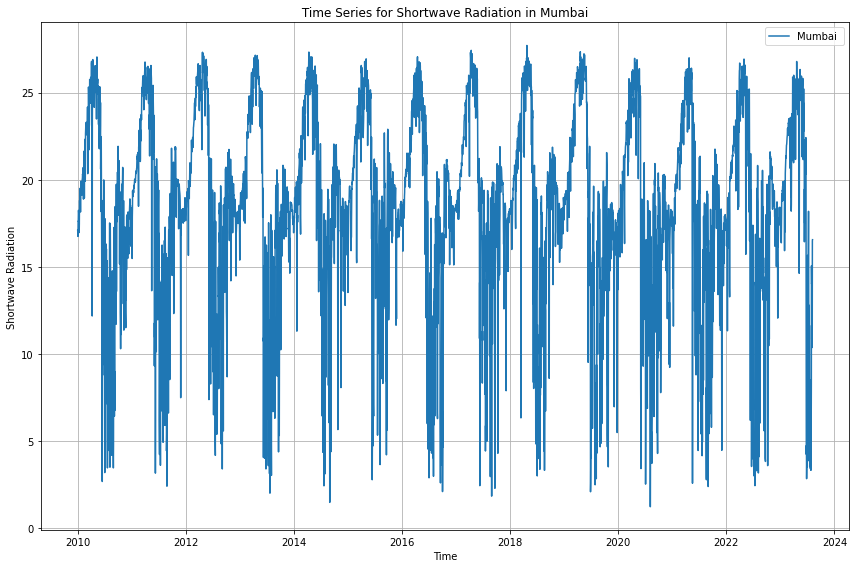

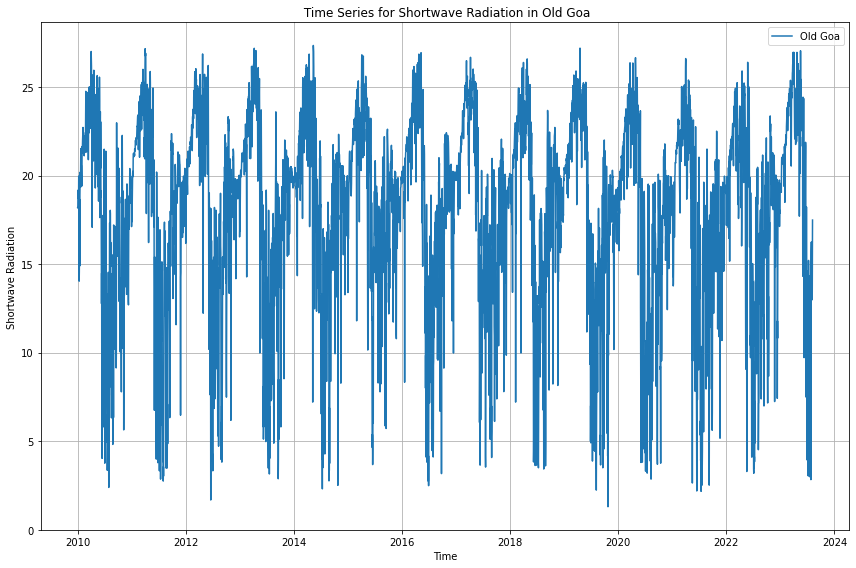

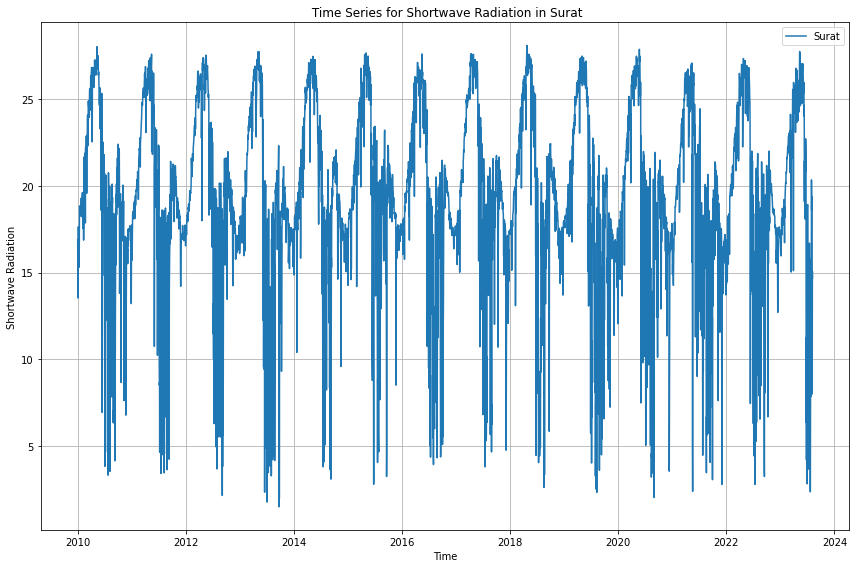

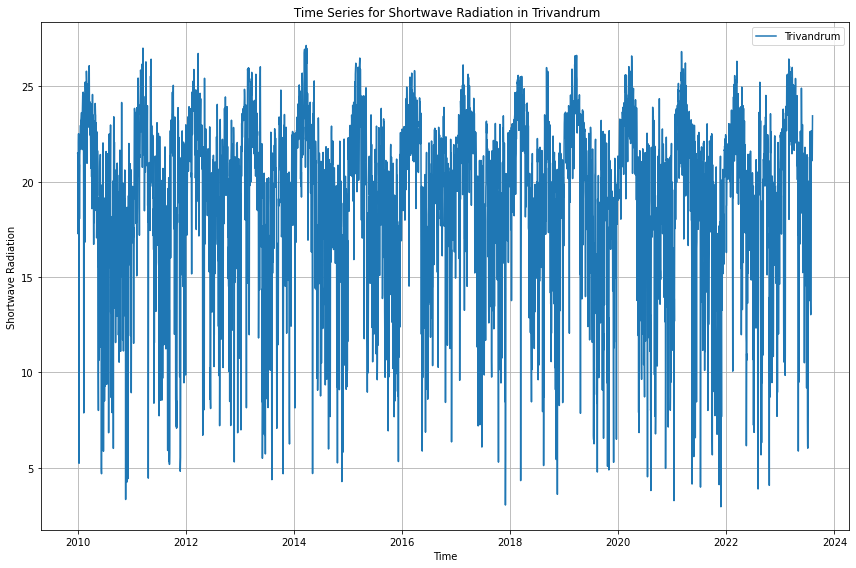

In [8]:
for city, group_data in data.groupby('city'):
    plt.figure(figsize=(12, 8))
    plt.plot(group_data['time'].values, group_data['shortwave_radiation_sum'].values, label=city)
    plt.title(f' Time Series for Shortwave Radiation in {city}')
    plt.xlabel('Time')
    plt.ylabel('Shortwave Radiation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### What is the average shortwave radiation sum (measured in MJ/m²) for each year, and how does it vary across different cities?

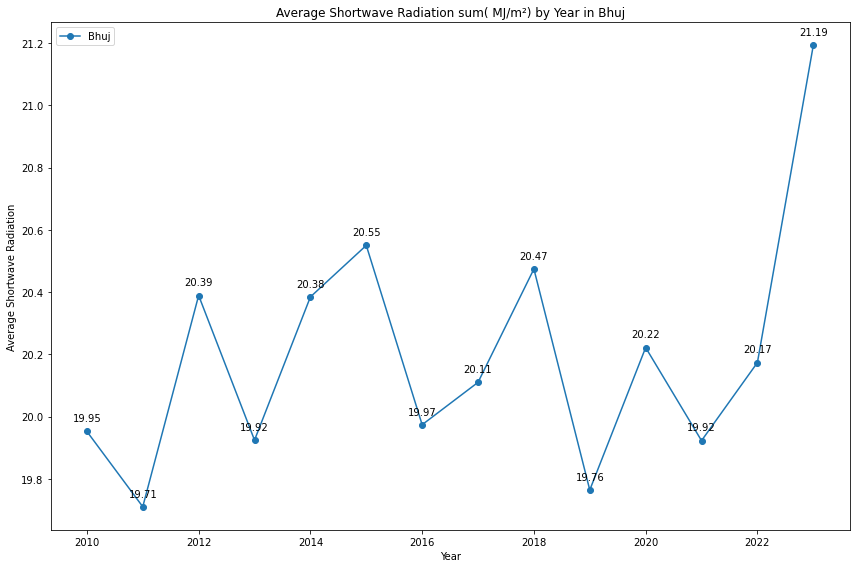

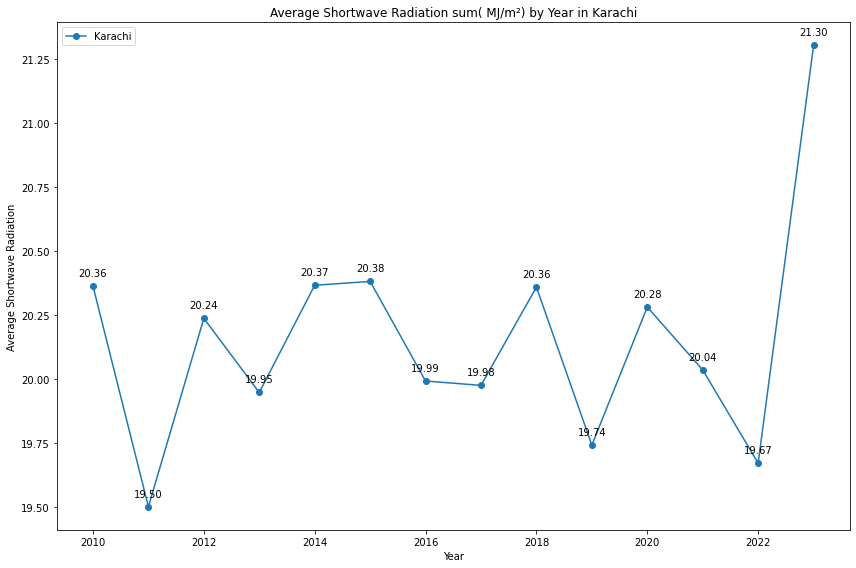

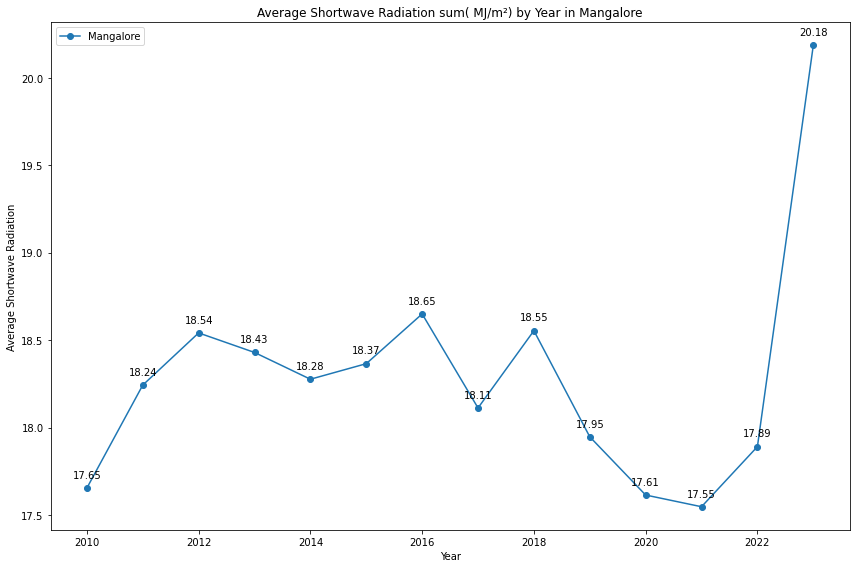

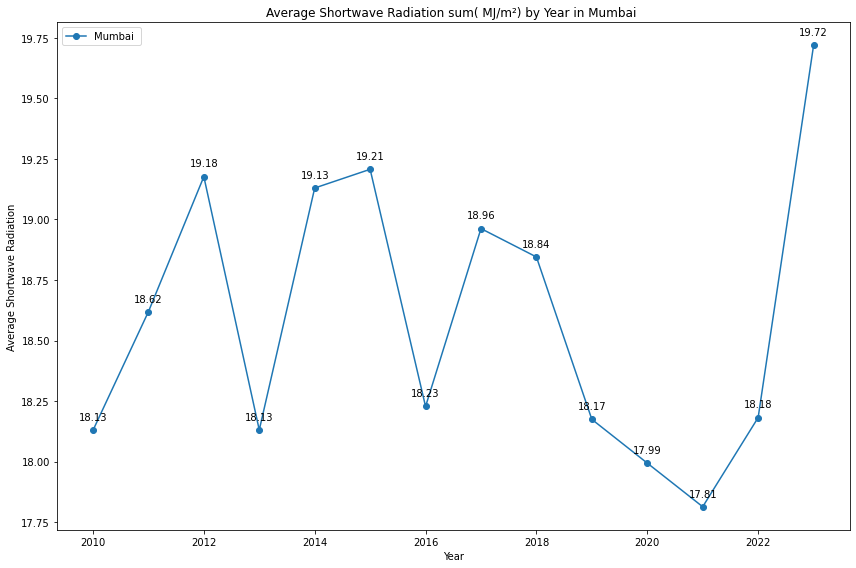

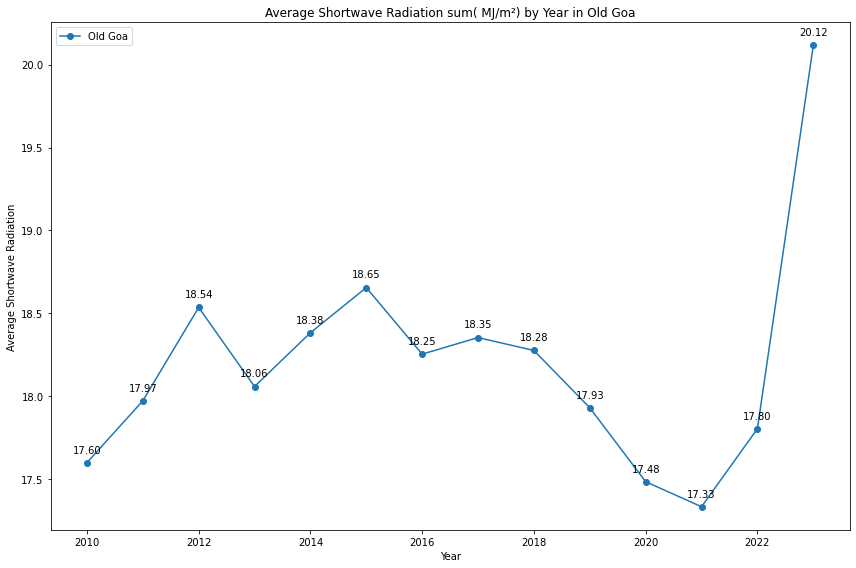

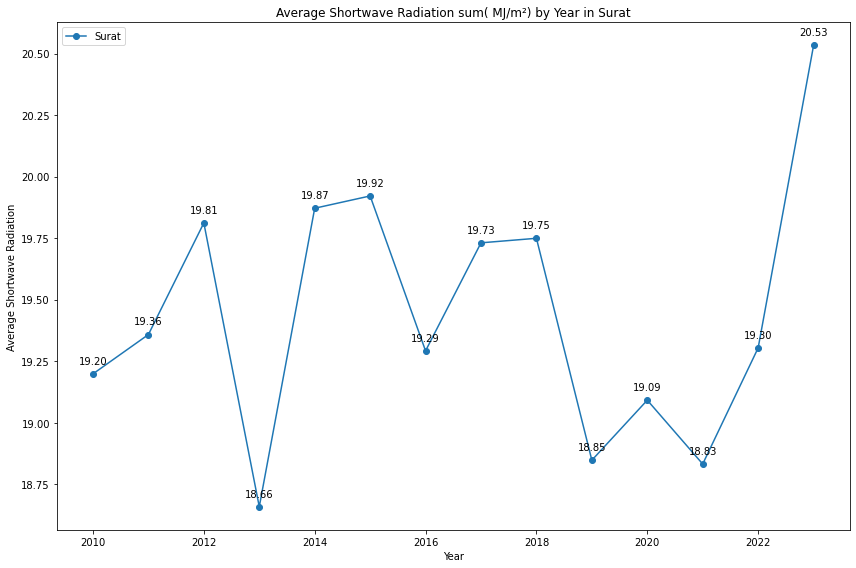

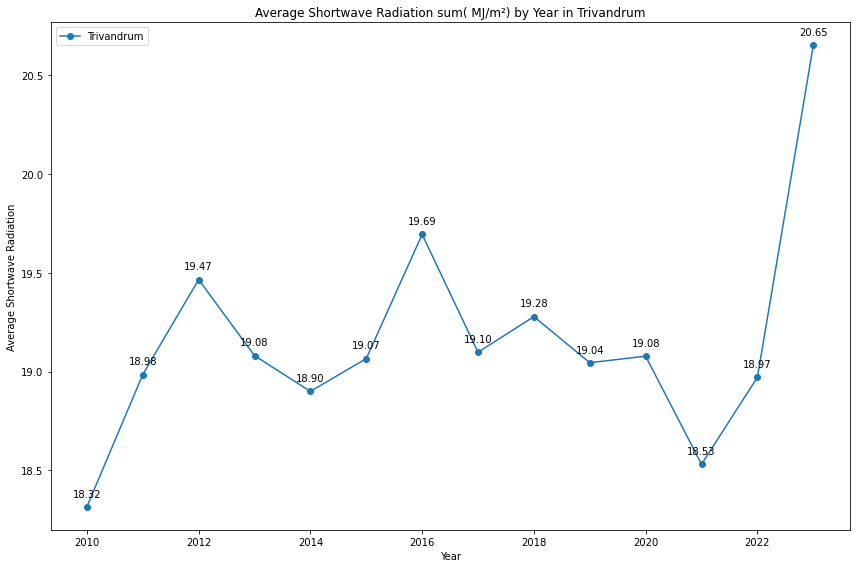

In [9]:
data['year'] = data['time'].dt.year

for city, group_data in data.groupby('city'):
    avg_sw_radiation_per_year = group_data.groupby('year')['shortwave_radiation_sum'].mean()

    plt.figure(figsize=(12, 8))
    plt.plot(avg_sw_radiation_per_year.index, avg_sw_radiation_per_year.values, marker='o', linestyle='-', label=city)
    
    # Annotate average values
    for year, avg_value in avg_sw_radiation_per_year.items():
        plt.annotate(f'{avg_value:.2f}', (year, avg_value), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title(f'Average Shortwave Radiation sum( MJ/m²) by Year in {city}')
    plt.xlabel('Year')
    plt.ylabel('Average Shortwave Radiation')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
